## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
data_path=r'/Users/Lilian/Downloads/Data Analytics Course/Data Analytics Immersion/Acheivement 4/04-2024 Instacart Basket Analysis/'

In [3]:

df_project_data = pd.read_pickle(os.path.join(data_path,'02 Data','Prepared Data','orders_products_customers.pkl'))


In [4]:
df_project_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,first_name,last_Name,gender,state,age,date_joined,number_of_fam_members,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


### 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
#### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

In [8]:
df_project_data.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price_spent', 'Spending_flag',
       'ordering_median', 'Customer_order_frequency', 'first_name',
       'last_Name', 'gender', 'state', 'age', 'date_joined',
       'number_of_fam_members', 'marital_status', 'income', '_merge'],
      dtype='object')

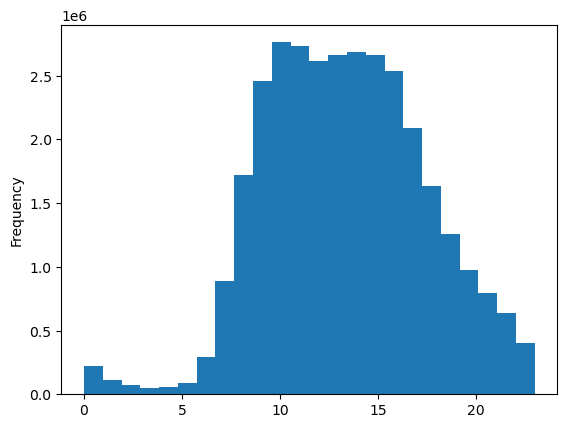

In [9]:
hist = df_project_data['order_hour_of_day'].plot.hist(bins = 24)

#### after midnight hours when number of orders are very low, number of orders start to rise aftre 10:00 in the morning and maintaining a steady high trend until 16:00 ~ 17:00, after which shows a gradual decrease toward the evening again.

### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [10]:
df_project_data['loyalty_flag'].info

<bound method Series.info of 0           Regular customer
1           Regular customer
2           Regular customer
3           Regular customer
4           Regular customer
                  ...       
32404854        New customer
32404855        New customer
32404856        New customer
32404857        New customer
32404858        New customer
Name: loyalty_flag, Length: 32404859, dtype: object>

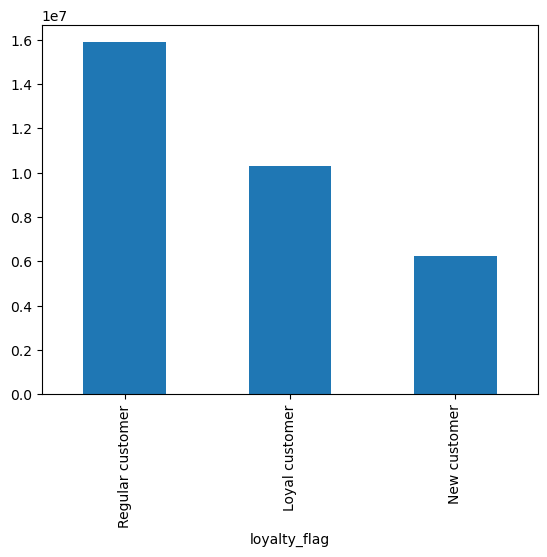

In [11]:
bar = df_project_data['loyalty_flag'].value_counts().plot.bar()

### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [12]:
# first creating a sample data for prices and hours of the day columns
np.random.seed(4)
dev = np.random.rand(len(df_project_data)) <= 0.7

In [13]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [14]:
# then store 70% of data sample in big and 30% in small dataframes
big = df_project_data[dev]
small = df_project_data[~dev]

In [15]:
len(df_project_data)

32404859

In [16]:
len (big) + len (small)

32404859

In [17]:
df_small = small[['prices','order_hour_of_day']] 

/Users/lilian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lilian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


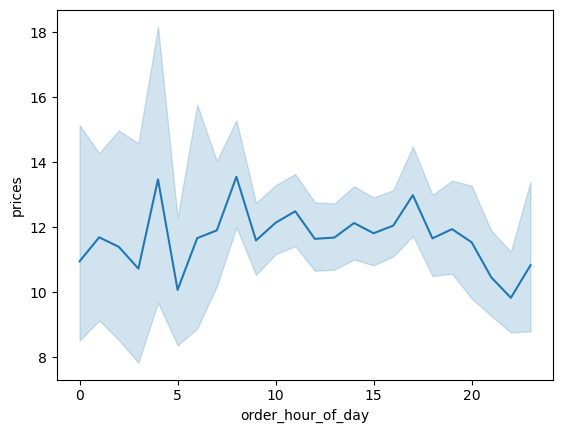

In [26]:
expenditure_line = sns.lineplot(data = df_small, x = 'order_hour_of_day',y = 'prices') 

#### chart above created from sample data shows the fluctuation of prices during hours of day, mainly drastic ups and downs at the beginning of the day and then a more steady fluctuation along the rest of hours of the day, with few picks at morning before 10:00 and afternoon after 15:00. 

### 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
##### In a markdown cell beneath your line chart, describe what the line chart shows

In [27]:
# creating a separate sample only for age and family status
df_small_customers_demo = small[['age','number_of_fam_members']] 

In [28]:
df_small_customers_demo

,age,number_of_fam_members
0,81,1
2,81,1
3,81,1
6,81,1
10,81,1
...,...,...
32404841,68,3
32404842,68,3
32404843,68,3
32404849,21,3


/Users/lilian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lilian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


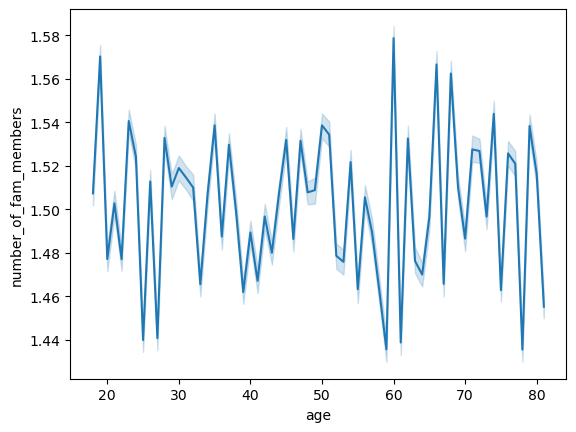

In [29]:
customer_demo_line = sns.lineplot(data = df_small_customers_demo, x = 'age',y = 'number_of_fam_members') 

#### it's hard to identify a corellation among age and number of dependants in the family, as the chart fluctuations similarly for each age having drastic increases and drops. 

### 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
#### In a markdown cell beneath your scatterplot, describe what the scatterplot shows

In [23]:
# creating a separate sample for age and income
df_small_age_income = small[['age','income']] 

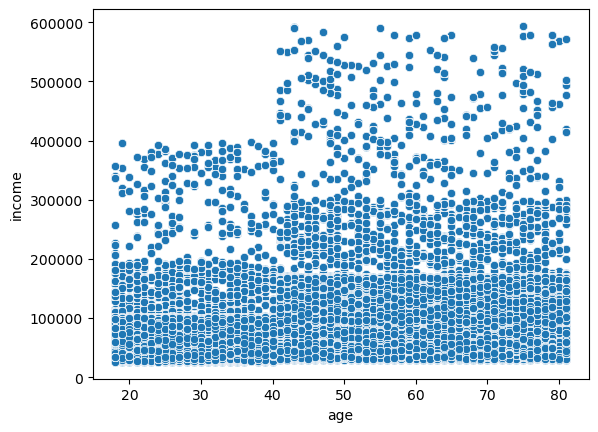

In [24]:
scatterplot = sns.scatterplot(data = df_small_age_income, x = 'age', y = 'income')

#### it seems there is a base income range of 0 - 200K for all ages as the lower concentrated dots show on the chart. As well this ranges gets even more concentrated towars higher age ranges compared to 20-45 age groups. 
#### starting from mid 40's up until 80's comes a higher income ranges above 400K with a lower concentration but certain upward trend.

### 8. Export your visualizations as “.png” files in your relevant project folder.

In [30]:
hist.figure.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'order_hour_of_day_histogram.png'))

In [31]:
bar.figure.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'loyalty_flag_bar_chart.png'))

In [32]:
expenditure_line.figure.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'hour_expenditure.png'))

In [33]:
customer_demo_line.figure.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'cutomer_demographic.png'))

In [34]:
scatterplot.figure.savefig(os.path.join(data_path, '04 Analysis','Visualizations', 'ang_income_scatterplot.png'))